In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from time import time 


In [4]:
#Nombre de las estrellas usadas para el trabja
Estrella01="126780"
Estrella02="228382"
Estrella04="192212"
Estrella03="270379"
Estrella05="79610"
Estrella06="239698"
Estrella07="318572"
Estrella08="303837"
Estrella09="344559"
Estrella10="440072"

Estrella11="6487"
Estrella12="21841"
Estrella13="55965"
Estrella14="79631"
Estrella15="86332"
Estrella16="93939"
Estrella17="149541"
Estrella18="262813"
Estrella19="318528"
Estrella20="424890"

Estrella21="134411"
Estrella22="142893"
Estrella23="184038"
Estrella24="286532"
Estrella25="447509"


In [5]:
#Importacion de los datos de las estrellas de OGLE
Estrella=Estrella01
Datos=np.loadtxt(Estrella+".dat")
AñoJuliano=Datos[:,0]
Intensidad=Datos[:,1]


419


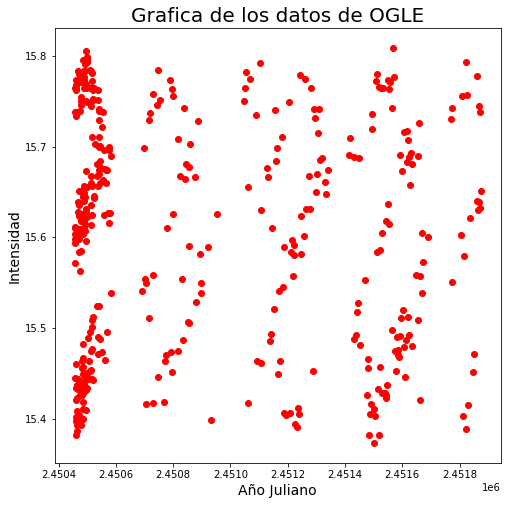

In [8]:
#Grafica de los datos de OGLE de la intensidad vs Año
plt.figure(figsize=(8, 8))
plt.scatter(AñoJuliano, Intensidad,c="r")
plt.xlabel("Año Juliano",fontsize=14)
plt.ylabel("Intensidad",fontsize=14)
plt.title("Grafica de los datos de OGLE",fontsize=20)
print(len(AñoJuliano))

### La funcion de fase 
$\phi = \frac{t-t_{1}}{p}-[\frac{t-t_{1}}{p}]$

In [9]:
#Definicion de la funcion de fase
def phi(t,t1,p):
    return (((t-t1)/p)-int((t-t1)/p))

In [10]:
#En esta linea se añade fase para la intensidad y los años
def Fases(Intensidad,periodo,AñoJuliano):
    Años=[]
    t0=AñoJuliano[0]
    j=0
    MinIntensidad=min(Intensidad)
    MaxIntensidad=max(Intensidad)
    for i in AñoJuliano:
        Años.append(phi(i,t0,periodo))
        j=j+1
    Intensidad=(Intensidad-MinIntensidad)/(MaxIntensidad-MinIntensidad)
    Años=np.array(Años)
    return [Años,Intensidad]

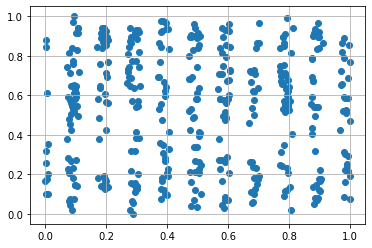

In [11]:
#Curva de luz normalizada
res=Fases(Intensidad,10,AñoJuliano)
plt.scatter(res[0],res[1])
plt.xlabel("Periodo Normalizada",fontsize=16)
plt.xlabel("Magnitud Normalizada",fontsize=16)
plt.grid()

In [12]:
#Definicion de entropia
def entropia(mu):
    res=0
    if(mu!=0):
        res=(mu)*math.log(mu)
    return res


In [21]:
#Calculo de Entropia para un periodo
def calculoEntropia(Años,IntensidadN,grilla):
    pasos=1/grilla
    Entropia=0
    for j1 in range(grilla):
        j2=j1/grilla
        Año=np.where((Años>=j2) & (Años<=(j2+pasos)))   
        
        for i1 in range(grilla):
            i2=i1/grilla
            InRango=IntensidadN[Año[0]]
           
            Ids=np.where((InRango>=i2) & (InRango<=(i2+pasos)))
            aa=len(Ids[0])/(len(Años))
            
            Entropia-=entropia(aa)
    return Entropia


In [22]:
calculoEntropia(res[0],res[1],4)

2.7450573743135416

In [23]:
#Calcula el minimo en una serie de datos
def minimo(Periodos,Entropia):
    mini=100
    pp=0
    for i in range(len(Entropia)):
        if(mini>Entropia[i]):
            mini=Entropia[i]
            pp=Periodos[i]
    return(pp)

In [24]:
#Implementancion del algoritmo minima entropia
def MinimaEntropia(PeriodoInicial,presicion,pFina,Años,IntensidadI,Grilla):
    Periodos=[]
    Entropia=[]
    #Comienza con un periodo Inicial y recorre a pasos de precision hasta el periodo FInal
    Periodo=PeriodoInicial
    while(Periodo<pFina):
        #Fasea los datos con el periodo dado
        News=Fases(IntensidadI,Periodo,Años)
        #Calcula la entropia con los datos fasados y  normalizados
        EntropiaP=calculoEntropia(News[0],News[1],Grilla)
        #Se añade los valores calculados de entropia normalizada y el periodo 
        Entropia.append(EntropiaP/(math.log(Grilla*Grilla)))
        Periodos.append(Periodo)
        #Da el siguiente paso
        Periodo+=presicion
    #Graficar 
    plt.plot(Periodos,Entropia,c="r", label=("Grilla"+str(Grilla)+"*"+str(Grilla)+", Precision"+str(presicion)+", Rango "+ str(PeriodoInicial)+"-"+str(pFina)))
    plt.title("Entropia vs periodo")
    plt.legend()
    plt.xlabel("Periodo p(s)")
    plt.ylabel("Entropia ")
    PeriodoReal=minimo(Periodos,Entropia)
    return(PeriodoReal)

El periodo calculado es 15.54814600000062
El tiempo de ejecucion es 22.85781502723694


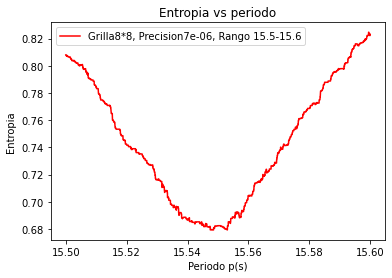

In [163]:
#Ejecucion de Minima Entropia
tiempo_inicial = time() 
Periodo=MinimaEntropia(#PeriodoInicial,Paso,PeriodoFinal,AñoJuliano,Intensidad,Grilla)
tiempo_Final = time() 
print("El periodo calculado es "+ str(Periodo))
print("El tiempo de ejecucion es "+str(tiempo_Final-tiempo_inicial))

In [13]:
#Curva de luz con el periodo reportado
lll=Fases(Intensidad,Periodo,AñoJuliano)

plt.scatter(lll[0],Intensidad,c="k", alpha=0.5)
plt.scatter(lll[0]+1,Intensidad,c="k", alpha=0.5)
plt.gca().invert_yaxis()
plt.ylim(14.5,12.9)
plt.title(Estrella+" - Fwpeaks")
plt.xlabel("tiempo Dias (t)")
plt.ylabel("Intensidad Relativa mag")

NameError: name 'Periodo' is not defined